# Taller para el examen final

In [187]:
import sympy as sp
import numpy as np
from IPython.display import display
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Taylor superior

In [70]:
# Read the function
f = sp.parse_expr("x**2 + 2*x*y + y**3")
f

x**2 + 2*x*y + y**3

In [90]:
# Get the variables
x = sp.Matrix(sorted(list(f.free_symbols),key=str)).T
x

Matrix([[x, y]])

In [91]:
# Read the expasion poitn
x0 = sp.Matrix([1, 2]).T
x0

Matrix([[1, 2]])

In [92]:
f0 = f.subs(dict(zip(x, x0))).evalf()
f0

13.0000000000000

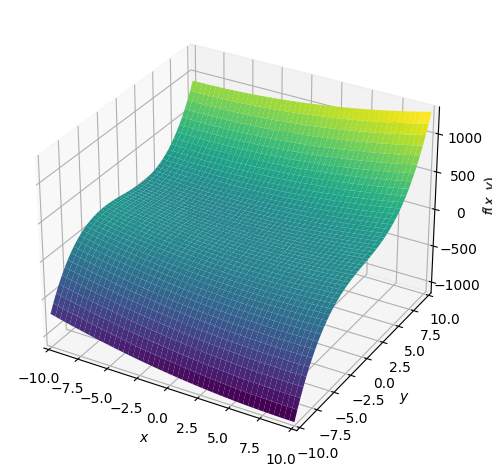

In [94]:
plot = sp.plotting.plot3d(f)

### Taylor de primer grado

Para una función de dos variables $f(x, y)$, el polinomio de taylor de primer grado cerca del punto $x_0$ es

$$
f(x) \approx\mathcal{L} \approx f(x_0) + [x - x_0]^t \nabla f(x_0) 
$$

In [96]:
gradient = sp.Matrix([f.diff(xi) for xi in x])
gradient

Matrix([
[   2*x + 2*y],
[2*x + 3*y**2]])

In [119]:
L = f0 + ((x - x0) * gradient.subs(dict(zip(x, x0))))[0]
L

6*x + 14*y - 21.0

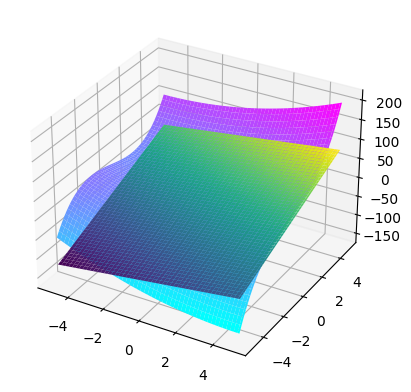

Text(0.5, 1.0, 'f')

Text(0.5, 1.0, 'L')

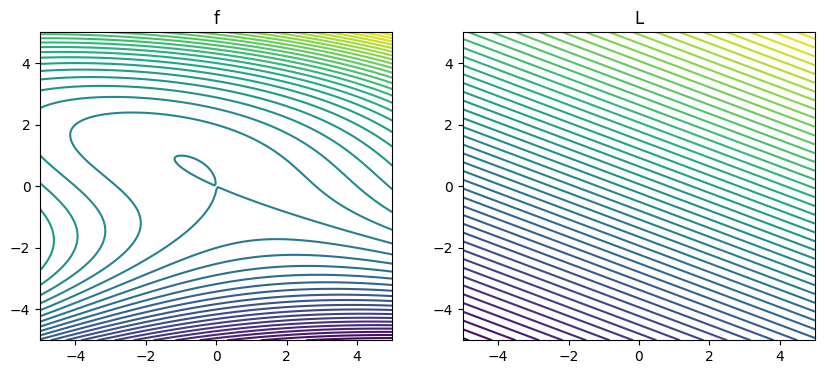

In [192]:
# Define the point to plot
P = (1, 1, f0)

# Create the meshgrid
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 200))
Z1 = sp.lambdify((x[0], x[1]), f, 'numpy')(X, Y)
Z2 = sp.lambdify((x[0], x[1]), L, 'numpy')(X, Y)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z1, cmap='cool')
ax.plot_surface(X, Y, Z2, cmap='viridis')

# Add the point to the plot
ax.scatter(P[0], P[1], P[2], color='r', s=10)
# ax.view_init(elev=20, azim=30)
# Show the plot
plt.show()

# CONTOUR
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
ax1.contour(X,Y,Z1,50)
ax1.set_title("f")
ax2.contour(X,Y,Z2,50)
ax2.set_title("L")
plt.show()

### Taylor de segundo grado
Teniendo $\mathcal{L}$, el polinomio de segundo grado (cuadratico) es

$$
\begin{align*}
f(x) \approx Q(x) &= f(x_0) + [x - x_0]^t\nabla f(x_0) + \cfrac{1}{2}[x - x_0]^t \nabla^2f_0(x - x_0) \\
&= \mathcal{L} + \cfrac{1}{2}[x - x_0]^t \nabla^2f_0(x - x_0)
\end{align*}
$$

In [23]:
hessian = sp.Matrix([[f.diff(xi).diff(xj) for xi in x] for xj in x])
hessian

Matrix([
[2,   2],
[2, 6*y]])

In [163]:
Q = L + (1/2)*((x - x0) * hessian.subs(dict(zip(x, x0))))[0]
Q

7.0*x + 15.0*y - 24.0

In [200]:
gradient_f0 = gradient.subs(list(zip(x, x0)))
hessian_f0 = hessian.subs(list(zip(x, x0)))

x_min = (hessian_f0.inv()*(-gradient_f0)).T + x0
x_min
f_min = f.subs(dict(zip(x, x_min))).evalf()
f_min

Matrix([[-6/5, 6/5]])

0.288000000000000

In [204]:
# Define the point to plot
P = (1, 1, f0)
P_min = (1, 1, f_min)

# Create the meshgrid
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 200))
Z1 = sp.lambdify((x[0], x[1]), f, 'numpy')(X, Y)
Z2 = sp.lambdify((x[0], x[1]), Q, 'numpy')(X, Y)

# Create the 3D plot
%matplotlib widget
fig = plt.figure()
ax = Axes3D(fig)
# ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z1, cmap='cool')
ax.plot_surface(X, Y, Z2, cmap='viridis')

# Add the point to the plot
ax.scatter(P[0], P[1], P[2], color='r', s=10)
ax.scatter(P_min[0], P_min[1], P_min[2], color='r', s=10)

# ax.view_init(elev=20, azim=30)
# Show the plot
plt.show()

# CONTOUR
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
ax1.contour(X,Y,Z1,50)
ax1.set_title("f")
ax2.contour(X,Y,Z2,50)
ax2.set_title("Q")
plt.show()

ModuleNotFoundError: No module named 'ipympl'

## Gradiente desendente

## Newton